In [3]:
import numpy as np                    # linear algebra
import pandas as pd                   # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv("C:\\Users\\dell\\Downloads\\train.csv")
test_data = pd.read_csv("C:\\Users\\dell\\Downloads\\test.csv") 

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

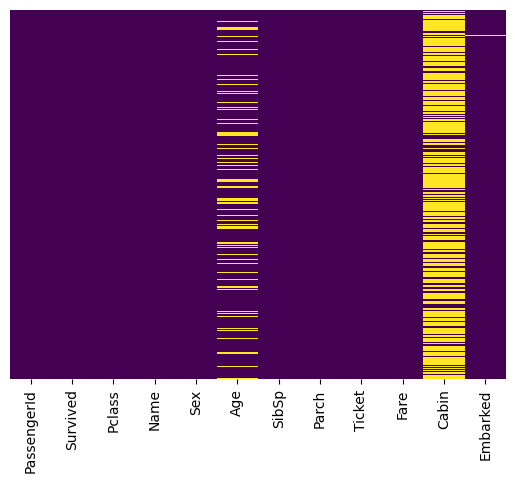

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

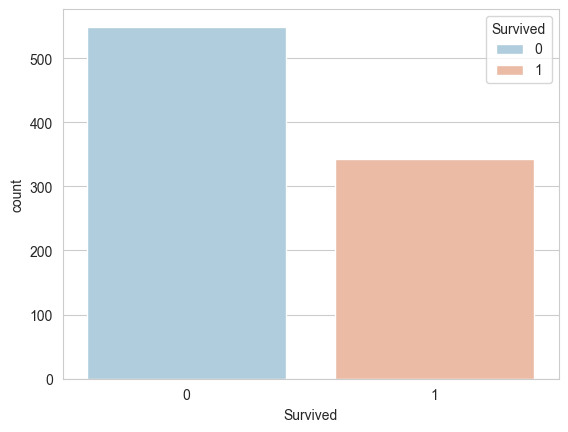

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Survived',data=train,palette='RdBu_r',)


<Axes: xlabel='Survived', ylabel='count'>

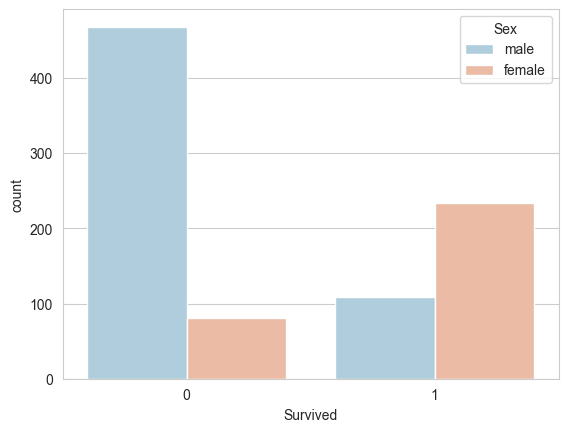

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

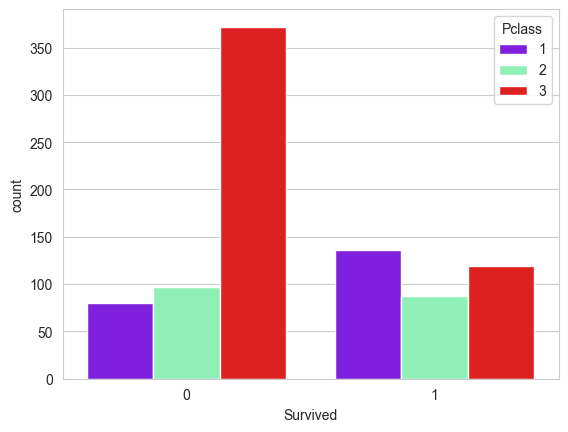

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: xlabel='Age', ylabel='Count'>

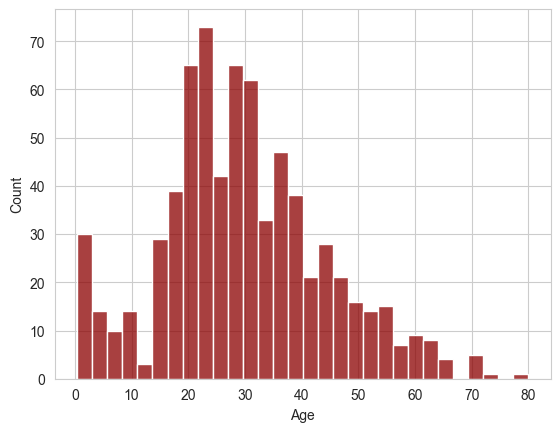

In [10]:
sns.histplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)


<Axes: >

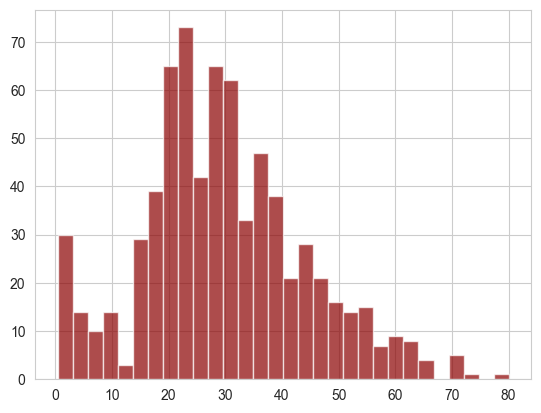

In [11]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)


<Axes: xlabel='SibSp', ylabel='count'>

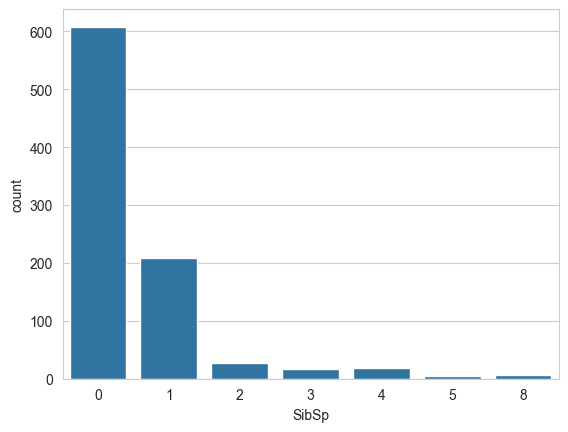

In [12]:
sns.countplot(x='SibSp',data=train)

<Axes: >

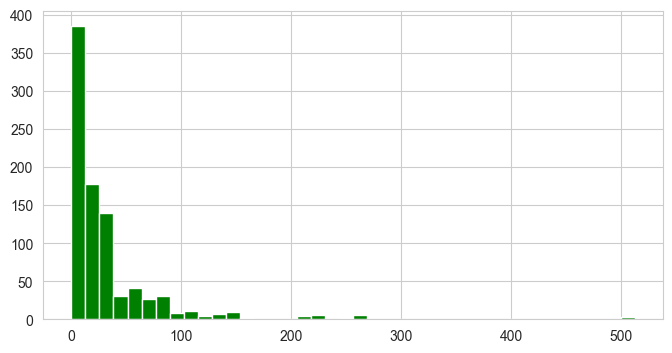

In [13]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

<Axes: xlabel='Pclass', ylabel='Age'>

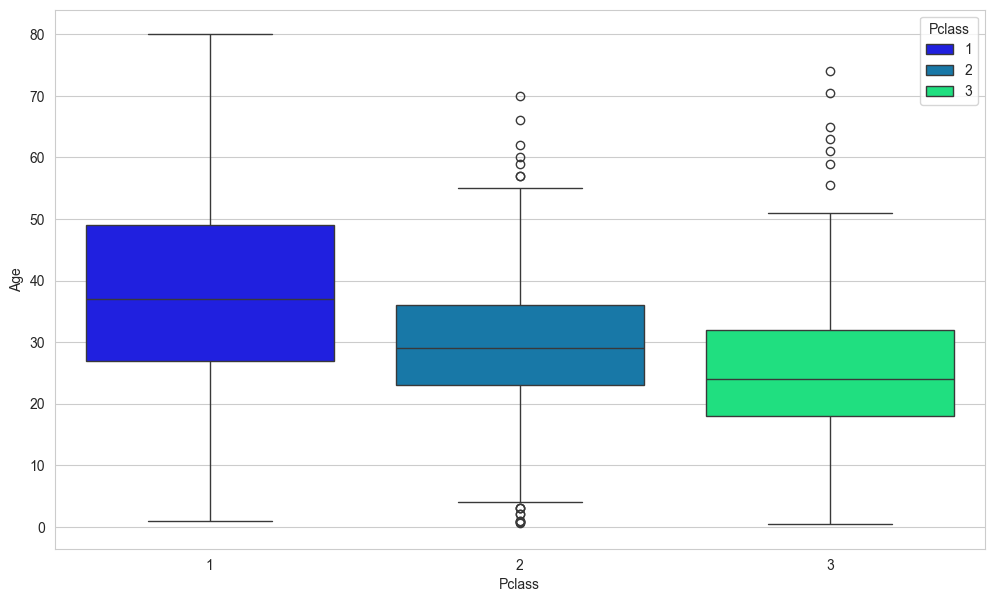

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',hue='Pclass',data=train,palette='winter')

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

<Axes: >

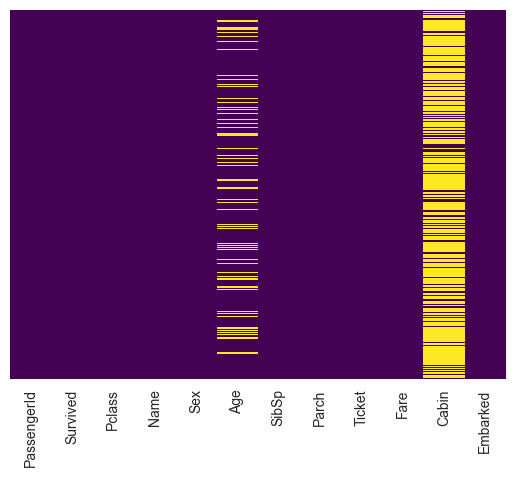

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [17]:
train.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

In [18]:
#for train data
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)

In [19]:
#for test data
test_sex = pd.get_dummies(test_data['Sex'],drop_first=True)
test_embark = pd.get_dummies(test_data['Embarked'],drop_first=True)
test_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test_data = pd.concat([test_data,test_sex,test_embark],axis=1)

In [23]:
#fill null value of fare column with 0
test_data['Fare'] = test_data['Fare'].fillna(0)



In [36]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived','PassengerId'],axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Define the steps in the pipeline
steps = [
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler()),  # Scale the features
    ('logmodel', LogisticRegression())  # Logistic regression model
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('logmodel', LogisticRegression())])

In [54]:
# Use the pipeline to make predictions on the test data
predictions = pipeline.predict(X_test)


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.81      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [58]:
id = test_data['PassengerId']
predictions = pipeline.predict(test_data.drop('PassengerId', axis=1))
result = pd.DataFrame({ 'PassengerId' : id, 'Survived': predictions })
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [60]:
import os

# Check if 'output' directory exists, if not, create it
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Write DataFrame to CSV file
result.to_csv(os.path.join(output_dir, 'titanic-predictions.csv'), index=False)
